In [5629]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from numpy import unique
from numpy import reshape
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Conv2D, Dense, BatchNormalization, Flatten, MaxPooling1D, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics  
from sklearn.tree import plot_tree

In [5630]:
path = r'\\Server2016\BEN\Dale Signs Print Data\Data'

In [5631]:
# Read the CSV file
df = pd.read_csv(os.path.join(path, "Original", 'Print Log start - November 2024 - Roland Log.csv'))

# Explore

In [5632]:
df.shape

(2804, 35)

In [5633]:
df.head(10)

,Event,Nick Name,Job Name,Size,Page Size_X[mm],Page Size_Y[mm],Media Name,Copy,Print Area_X[mm],Print Area_Y[mm],...,Print Area,Cyan:,Magenta:,Yellow:,Black:,Light Magenta:,Light Cyan:,Light Black,Sum of Ink,Ink CC sq ft
0,Print Canceled,XR-640#2,SOLD BURST Need 4 11-7-24 + Knights Trivia B...,4265130.0,694.26,325.26,3M™ IJ180Cv3,1.0,716.13,337.26,...,362.927224,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,0
1,New Job(A),XR-640#2,SOLD BURST Need 4 11-7-24 + Knights Trivia B...,4265130.0,694.26,325.26,3M™ IJ180Cv3,1.0,694.26,337.26,...,362.927224,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,0
2,Print End,XR-640#2,Axes Physical Therapy Emerson Building Inserts...,6426294.0,656.16,489.30,Generic Paper,1.0,656.16,501.30,...,509.847182,0.020,0.060,0.140,0.052,0.292,0.146,0.078,0.788,0.2225608064
3,New Job(A),XR-640#2,Axes Physical Therapy Emerson Building Inserts...,6426294.0,656.16,489.30,3M™ IJ180Cv3,1.0,656.16,501.30,...,509.847182,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,0
4,Print End,XR-640#2,Laks Side Door Decals 6 14 24 + Gershman Comm ...,6385346.0,722.84,505.88,3M™ IJ180Cv3,1.0,726.92,517.88,...,580.234948,0.173,0.213,0.233,0.055,0.257,0.161,0.033,1.125,0.2791972467
5,New Job(A),XR-640#2,Laks Side Door Decals 6 14 24 + Gershman Comm ...,6385346.0,722.84,505.88,3M™ IJ180Cv3,1.0,722.84,517.88,...,580.234948,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,0
6,Print End,XR-640#2,Wright Construction 2024 Ford Pick up logo 11 ...,6836442.0,851.60,2126.89,3M™ IJ180Cv3,1.0,866.30,2138.89,...,2823.297669,0.506,1.979,1.819,0.190,2.048,0.792,1.108,8.442,0.4305773399
7,New Job(A),XR-640#2,Wright Construction 2024 Ford Pick up logo 11 ...,6836442.0,851.60,2126.89,3M™ IJ180Cv3,1.0,851.60,2138.89,...,2823.297669,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,0
8,Print End,XR-640#2,Wright Construction 2024 Ford Pick up logo 11 ...,6745606.0,902.05,1371.95,3M™ IJ180Cv3,1.0,904.99,1388.43,...,1941.275469,0.509,1.473,1.570,0.188,1.923,0.792,1.058,7.513,0.5572995782
9,Print Canceled,XR-640#2,Wright Construction 2024 Ford Pick up logo 11 ...,6745606.0,902.05,1371.95,Generic Vinyl II HD,1.0,904.99,1388.43,...,1941.275469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,0


In [5634]:
df.columns

Index(['Event', 'Nick Name', 'Job Name', 'Size', 'Page Size_X[mm]',
       'Page Size_Y[mm]', 'Media Name', 'Copy', 'Print Area_X[mm]',
       'Print Area_Y[mm]', 'Ink Consumption[cc]', 'Ink Name', 'Input Time',
       'RIP Start Time', 'RIP End Time', 'Print Start Time', 'Print End Time',
       'Details', 'Total Print Time', 'Material Width', 'Width (in)',
       'Esitmated Material Length (in)', 'Area (in)', 'Extra for Lead in',
       'Print Length', 'Print Area', 'Cyan:', 'Magenta:', 'Yellow:', 'Black:',
       'Light Magenta:', 'Light Cyan:', 'Light Black', 'Sum of Ink',
       'Ink CC sq ft'],
      dtype='object')

# Wrangling

In [5635]:
df = df[df['Event'] == 'Print End']

In [5636]:
df.shape

(237, 35)

In [5637]:
columns_to_remove = [
    'Event', 'Nick Name', 'Print Area_X[mm]', 'Page Size_X[mm]', 'Page Size_Y[mm]',
    'Print Area_Y[mm]', 'Ink Consumption[cc]', 'Ink Name', 'Input Time',
    'RIP Start Time', 'RIP End Time', 'Print Start Time', 'Print End Time',
    'Details'
]

df = df.drop(columns=columns_to_remove, errors='ignore')

In [5638]:
df.shape

(237, 21)

In [5639]:
df.columns

Index(['Job Name', 'Size', 'Media Name', 'Copy', 'Total Print Time',
       'Material Width', 'Width (in)', 'Esitmated Material Length (in)',
       'Area (in)', 'Extra for Lead in', 'Print Length', 'Print Area', 'Cyan:',
       'Magenta:', 'Yellow:', 'Black:', 'Light Magenta:', 'Light Cyan:',
       'Light Black', 'Sum of Ink', 'Ink CC sq ft'],
      dtype='object')

In [5640]:
# Dictionary for file codes, materials, and sizes
file_codes_dict = {
    "MAG24": ("Magnets", 24),
    "INT30": ("Intermediate White", 30),
    "INT54": ("Intermediate White", 54),
    "INT60": ("Intermediate White", 60),
    "HPW24": ("High Performance White", 24),
    "HPW30": ("High Performance White", 30),
    "HPW36": ("High Performance White", 36),
    "HPW54": ("High Performance White", 54),
    "HPW60": ("High Performance White", 60),
    "HPC54": ("High Performance Clear", 54),
    "BAN38": ("Banner", 38),
    "BAN54": ("Banner", 54),
    "BAN63": ("Banner", 63),
    "RUB36": ("Roll-up banner", 36),
    "TW24": ("Translucent white", 24),
    "TW30": ("Translucent white", 30),
    "TW60": ("Translucent white", 60),
    "HTV54": ("High Tack Vinyl", 54),
    "EDC30": ("Ez Dot (Clear)", 30),
    "EDC54": ("Ez Dot (Clear)", 54),
    "EDW30": ("Ez Dot (White)", 30),
    "EDW54": ("Ez Dot (White)", 54),
    "THP30": ("Thick Paper/ Heavy Paper", 30),
    "THP36": ("Thick Paper/ Heavy Paper", 36),
    "THP54": ("Thick Paper/ Heavy Paper", 54),
    "PERF54": ("Perforated", 54),
    "PERF60": ("Perforated", 60),
    "CUSTORD": ("Custom Ordered",0),
    "RFV48": ("Reflective Vinyl", 48),
    "CAR54": ("Cardinal", 54),
    "RFVW30": ("Reflective White Vinyl", 30),
    "RFVW48": ("Reflective White Vinyl", 48),
    "WSC54": ("White Static Cling", 54),
    "DN48": ("Day Night", 48),
}

In [5641]:
# Rename the columns'
df = df.rename(columns={'Material Width':'Material Width (in)','Width (in)': 'Print Width (in)', 'Area (in)': 'Material Area (in)', 'Print Area':'Print Area (in)','Print Length':'Print Length (in)'})

In [5642]:
# Adding the 'Material Type' column based on the file code in 'Job Name'
def find_material_type(job_name):
    for code, (material, size) in file_codes_dict.items():
        if code in job_name:
            return material
    return None  # Default value if no match is found

df["Material Type"] = df["Job Name"].apply(find_material_type)

In [5643]:
# Adding the 'Material Width' column based on the file code in 'Job Name'
def find_material_width(job_name):
    for code, (material, size) in file_codes_dict.items():
        if code in job_name:
            return size
    return None  # Default value if no match is found

# Update the DataFrame with the 'Material Width' column
df["Material Width (in)"] = df["Job Name"].apply(find_material_width)

In [5644]:
# Adding the 'Post Processing' column based on the presence of 'LAMI' in 'Job Name'
df["Post Processing"] = df["Job Name"].apply(lambda job_name: "Laminated" if "LAMI" in job_name else "Not Laminated")

In [5645]:
# Updating the 'Print Width' to the data for that entry to material width based on the presence of 'FLL' in 'Job Name'
df["Print Width (in)"] = df.apply(
    lambda row: row["Material Width (in)"] if "FLL" in row["Job Name"] else row["Print Width (in)"], 
    axis=1
)

In [5646]:
# Check for '50 percent size' in 'Job Name' and double the values in the specified columns
columns_to_double = ['Print Area (in)', 'Print Length (in)', 'Print Width (in)']

df.loc[df['Job Name'].str.contains("50 percent size", case=False, na=False), columns_to_double] *= 2

In [5647]:
# Update 'Extra for Lead in' column based on 'Post Processing' column
df['Extra for Lead in'] = df['Post Processing'].apply(lambda x: 30 if x == "Laminated" else 10)

In [5648]:
# Update Material Area
df['Esitmated Material Length (in)']=(df['Print Length (in)']+df['Extra for Lead in'])

In [5649]:
# Update Material Area and Print Area
df['Material Area (in)']=df['Esitmated Material Length (in)']*df['Material Width (in)']
df['Print Area (in)']=df['Print Length (in)']*df['Print Width (in)']

In [5650]:
# Create a new column 'Print Job Type' based on the presence of '+' in 'Job Name'
df["Print Job Type"] = df["Job Name"].apply(lambda x: "Multi Print Job" if "+" in x else "Single Print Job")

In [5651]:
#Add waste percentage
df['Material Waste'] = 1-df['Print Area (in)']/df['Material Area (in)']

In [5652]:
# Reset the index of the DataFrame and drop the old index
df = df.reset_index(drop=True)

In [5653]:
# Get the 'Print Length (in)' for the specific Job Name
print_length = df.loc[df['Job Name'] == '50 percent size_4x20 BANNER  2nd Chance RV Sign NEW PHONE  10-29-24_BAN63.eps', 'Print Area (in)'], df.loc[df['Job Name'] == '50 percent size_4x20 BANNER  2nd Chance RV Sign NEW PHONE  10-29-24_BAN63.eps', 'Print Length (in)'] , df.loc[df['Job Name'] == '50 percent size_4x20 BANNER  2nd Chance RV Sign NEW PHONE  10-29-24_BAN63.eps', 'Print Width (in)']

# Display the result
print(print_length)

(5    24259.7
Name: Print Area (in), dtype: float64, 5    485.0
Name: Print Length (in), dtype: float64, 5    50.02
Name: Print Width (in), dtype: float64)


In [5654]:
df['Above Waste Allowance'] = (df['Material Waste'] > 0.25).astype(int)

In [5655]:
df.head(10)

,Job Name,Size,Media Name,Copy,Total Print Time,Material Width (in),Print Width (in),Esitmated Material Length (in),Material Area (in),Extra for Lead in,...,Light Magenta:,Light Cyan:,Light Black,Sum of Ink,Ink CC sq ft,Material Type,Post Processing,Print Job Type,Material Waste,Above Waste Allowance
0,Axes Physical Therapy Emerson Building Inserts...,6426294.0,Generic Paper,1.0,0:04:05,36.0,25.83,29.736220,1070.503937,10,...,0.292,0.146,0.078,0.788,0.2225608064,Roll-up banner,Not Laminated,Single Print Job,0.523788,1
1,Laks Side Door Decals 6 14 24 + Gershman Comm ...,6385346.0,3M™ IJ180Cv3,1.0,0:06:02,30.0,28.46,50.388976,1511.669291,30,...,0.257,0.161,0.033,1.125,0.2791972467,High Performance White,Laminated,Multi Print Job,0.616139,1
2,Wright Construction 2024 Ford Pick up logo 11 ...,6836442.0,3M™ IJ180Cv3,1.0,0:21:59,36.0,33.53,94.208268,3391.497638,10,...,2.048,0.792,1.108,8.442,0.4305773399,High Performance White,Not Laminated,Single Print Job,0.167476,0
3,Wright Construction 2024 Ford Pick up logo 11 ...,6745606.0,3M™ IJ180Cv3,1.0,0:15:00,36.0,35.51,64.662598,2327.853543,10,...,1.923,0.792,1.058,7.513,0.5572995782,High Performance White,Not Laminated,Single Print Job,0.166155,0
4,Hard Hat Decals 11-4-24_INT30.eps,9289094.0,Generic Vinyl II HD,1.0,0:07:02,30.0,26.74,23.972441,719.173228,10,...,0.481,0.310,0.300,2.531,0.9756380643,Intermediate White,Not Laminated,Single Print Job,0.480483,1
5,50 percent size_4x20 BANNER 2nd Chance RV Sig...,7020610.0,Generic Banner II,1.0,1:05:58,63.0,50.02,495.000000,31185.000000,10,...,14.301,7.199,5.354,60.501,1.436263039,Banner,Not Laminated,Single Print Job,0.222072,0
6,36x36 Were Camping Sign NEW PHONE 10-29-24_B...,7295182.0,Generic Banner II,1.0,0:07:56,38.0,34.00,48.013780,1824.523622,10,...,0.917,1.221,0.616,5.089,0.5669960107,Banner,Not Laminated,Single Print Job,0.291613,1
7,3x4 banner need 2 NEW PHONE 10-29-24_BAN38.eps,6760834.0,Generic Banner II,2.0,0:20:58,38.0,34.50,110.026772,4181.017325,10,...,3.778,2.139,1.630,15.873,0.6623478959,Banner,Not Laminated,Single Print Job,0.174621,0
8,True Title Hampton Temp Banner_BAN38.eps,6760358.0,Generic Banner II,1.0,0:20:59,38.0,32.01,114.486221,4350.476379,10,...,1.138,0.478,0.546,4.122,0.1774493896,Banner,Not Laminated,Single Print Job,0.231210,0
9,A & A Donuts_Reverse Side_logo print_TW24.eps,6365610.0,Generic Vinyl II HD,1.0,0:11:01,24.0,20.49,42.277953,1014.670866,10,...,0.320,0.101,0.068,1.424,0.3101080241,Translucent white,Not Laminated,Single Print Job,0.348187,1


In [5656]:
df.columns

Index(['Job Name', 'Size', 'Media Name', 'Copy', 'Total Print Time',
       'Material Width (in)', 'Print Width (in)',
       'Esitmated Material Length (in)', 'Material Area (in)',
       'Extra for Lead in', 'Print Length (in)', 'Print Area (in)', 'Cyan:',
       'Magenta:', 'Yellow:', 'Black:', 'Light Magenta:', 'Light Cyan:',
       'Light Black', 'Sum of Ink', 'Ink CC sq ft', 'Material Type',
       'Post Processing', 'Print Job Type', 'Material Waste',
       'Above Waste Allowance'],
      dtype='object')

In [5657]:
df.to_csv(os.path.join(path, "Prepared", 'Wrangled_Print Log start - November 2024 - Roland Log.csv'))

# Create Training and Answer Data

In [5658]:
columns_to_remove_for_training = [
    'Job Name', 'Size', 'Material Waste', 'Above Waste Allowance', 'Cyan:',
       'Magenta:', 'Yellow:', 'Black:', 'Light Magenta:', 'Light Cyan:',
       'Light Black', 'Sum of Ink', 'Ink CC sq ft', 'Media Name', 'Total Print Time', 'Extra for Lead in','Esitmated Material Length (in)','Material Area (in)'
]

df_training =  df.drop(columns=columns_to_remove_for_training, errors='ignore')

In [5659]:
material_dict = {
    "Magnets": 1,
    "Intermediate White": 2,
    "High Performance White": 3,
    "High Performance Clear": 4,
    "Banner": 5,
    "Roll-up banner": 6,
    "Translucent White": 7,
    "High Tack Vinyl": 8,
    "Ez Dot (Clear)": 9,
    "Ez Dot (White)": 10,
    "Thick Paper/Heavy Paper": 11,
    "Perforated": 12,
    "SHIL SL Backlit Film": 13,
    "Reflective Vinyl": 14,
    "Cardinal": 15,
    "Reflective White Vinyl": 16,
    "White Static Cling": 17,
    "Day Night": 18,
    "Floor Graphics Decal": 19
}

df_training["Material Type"] = df_training["Material Type"].map(material_dict)



In [5660]:
df_training['Post Processing'] = (df_training['Post Processing'] == "Laminated").astype(int)

In [5661]:
df_training['Print Job Type'] = (df_training['Print Job Type'] == "Multi Print Job").astype(int)

In [5662]:
df_training = df_training.rename(columns={'Post Processing':'Laminated','Print Job Type': 'Multi Job Print'})

In [5663]:
columns_to_remove_for_answers = [
    'Job Name', 'Size', 'Media Name', 'Copy', 'Total Print Time',
       'Material Width (in)', 'Print Width (in)',
       'Esitmated Material Length (in)', 'Material Area (in)',
       'Extra for Lead in', 'Print Length (in)', 'Print Area (in)', 'Cyan:',
       'Magenta:', 'Yellow:', 'Black:', 'Light Magenta:', 'Light Cyan:',
       'Light Black', 'Sum of Ink', 'Ink CC sq ft', 'Material Type',
       'Post Processing', 'Print Job Type', 'Material Waste'
]

df_ans =  df.drop(columns=columns_to_remove_for_answers, errors='ignore')

In [5664]:
df_ans.head(10)

,Above Waste Allowance
0,1
1,1
2,0
3,0
4,1
5,0
6,1
7,0
8,0
9,1


In [5665]:
df_training

,Copy,Material Width (in),Print Width (in),Print Length (in),Print Area (in),Material Type,Laminated,Multi Job Print
0,1.0,36.0,25.83,19.736220,509.786575,6.0,0,0
1,1.0,30.0,28.46,20.388976,580.270268,3.0,1,1
2,1.0,36.0,33.53,84.208268,2823.503217,3.0,0,0
3,1.0,36.0,35.51,54.662598,1941.068870,3.0,0,0
4,1.0,30.0,26.74,13.972441,373.623071,2.0,0,0
...,...,...,...,...,...,...,...,...
232,1.0,38.0,38.00,58.833071,2235.656693,5.0,0,0
233,1.0,38.0,38.00,58.833071,2235.656693,5.0,0,0
234,2.0,30.0,25.49,127.574016,3251.861660,3.0,1,0
235,1.0,30.0,26.69,12.597244,336.220445,3.0,1,0


# Reshape Data

In [5666]:
df_training.shape

(237, 8)

In [5667]:
#Create an 'X' matrix by dropping the unneeded columns.
X = df_training
y = df_ans

In [5668]:
X.shape

(237, 8)

In [5669]:
# Turn X and y from a df to arrays

X = np.array(X)
y = np.array(y)

In [5670]:
# reshape
X = X.reshape(-1,8)

In [5671]:
# Check Shape

X

array([[ 1.  , 36.  , 25.83, ...,  6.  ,  0.  ,  0.  ],
       [ 1.  , 30.  , 28.46, ...,  3.  ,  1.  ,  1.  ],
       [ 1.  , 36.  , 33.53, ...,  3.  ,  0.  ,  0.  ],
       ...,
       [ 2.  , 30.  , 25.49, ...,  3.  ,  1.  ,  0.  ],
       [ 1.  , 30.  , 26.69, ...,  3.  ,  1.  ,  0.  ],
       [ 1.  , 63.  , 55.01, ...,  5.  ,  0.  ,  0.  ]])

# Split

In [5672]:
#Split data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [5673]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(189, 8) (189, 1)
(48, 8) (48, 1)


In [5674]:
# Example of downsampling
#X_train_small = X_train[:10000]  # Use only the first 10,000 samples for training
#y_train_small = y_train[:10000]

# Random Tree Forest

In [5675]:
X_train = X_train.reshape(X_train.shape[0], -1)

In [5676]:
# creating a RF classifier
clf = RandomForestClassifier(n_estimators=30, max_depth=5)

# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)

c:\Users\Chuck Benedick\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(max_depth=5, n_estimators=30)

# Finding Variable Importance

In [5677]:
newarray = clf.feature_importances_
print(clf.feature_importances_.shape)
newarray

(8,)


array([0.03110447, 0.05713047, 0.12306888, 0.30918006, 0.26242836,
       0.07080129, 0.14496824, 0.00131823])

In [5678]:

# performing predictions on the test dataset
y_pred = clf.predict(X_test)

accuracy =  metrics.accuracy_score(y_test, y_pred)
# using metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Model Accuracy:  0.9583333333333334


In [5679]:
print("y_test shape:", y_test.shape)
print("y_pred shape:", y_pred.shape)

y_test shape: (48, 1)
y_pred shape: (48,)


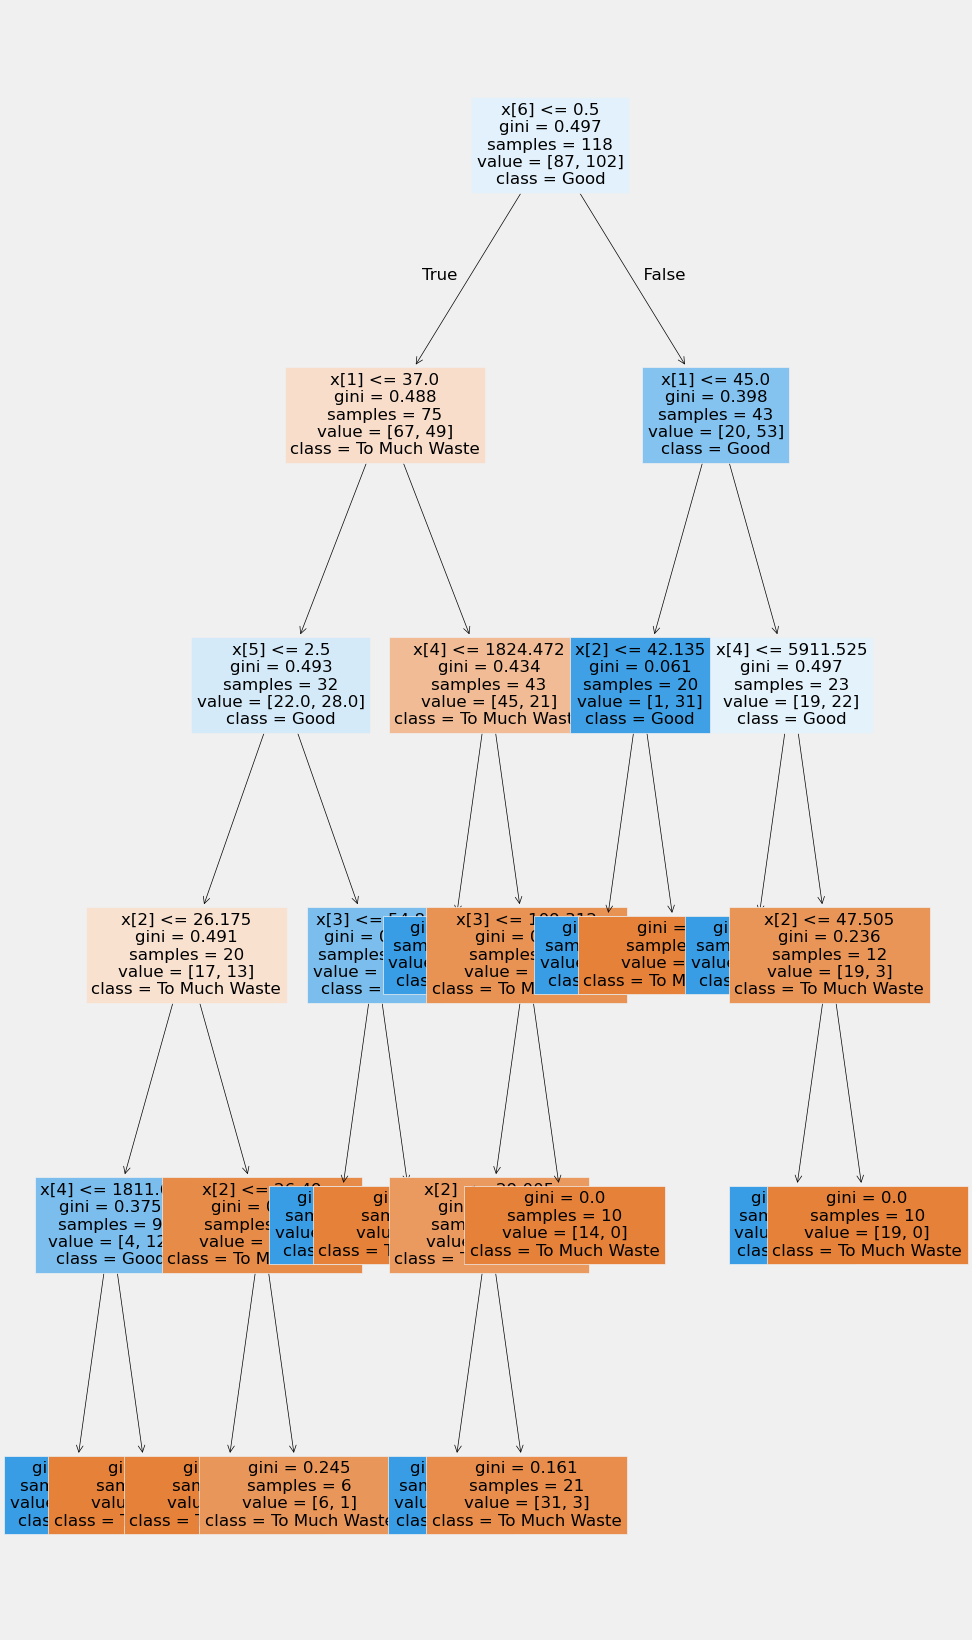

In [5680]:
types = {0:'To Much Waste', 1:'Good'}

fig = plt.figure(figsize=(10,20))
plot_tree(clf.estimators_[5], fontsize = 12, class_names=types, filled=True);
plt.show()

# Finding Variable Importance

In [5681]:
newarray = clf.feature_importances_
print(clf.feature_importances_.shape)
newarray

(8,)


array([0.03110447, 0.05713047, 0.12306888, 0.30918006, 0.26242836,
       0.07080129, 0.14496824, 0.00131823])

In [5682]:
# Reshape newarray to match the expected shape (9 rows, 1 column)
newarray = newarray.reshape(8, 1)
newarray

array([[0.03110447],
       [0.05713047],
       [0.12306888],
       [0.30918006],
       [0.26242836],
       [0.07080129],
       [0.14496824],
       [0.00131823]])

In [5683]:
sumarray = newarray.reshape(8)
sumarray

array([0.03110447, 0.05713047, 0.12306888, 0.30918006, 0.26242836,
       0.07080129, 0.14496824, 0.00131823])

In [5684]:
observations = {
0: 'Copy',
1: 'Material Width (in)',
2: 'Print Width (in)',
3: 'Print Length (in)',
4: 'Print Area (in)',
5: 'Material Type',
6: 'Laminated',
7: 'Multi Job Print',
}

In [5685]:
# Creating DataFrame
df_observ = pd.DataFrame({
    'Observation': list(observations.values()),
    'Value': sumarray
})

# Display the DataFrame
print(df_observ)

           Observation     Value
0                 Copy  0.031104
1  Material Width (in)  0.057130
2     Print Width (in)  0.123069
3    Print Length (in)  0.309180
4      Print Area (in)  0.262428
5        Material Type  0.070801
6            Laminated  0.144968
7      Multi Job Print  0.001318


In [5686]:
observation_names = 'Copy','Material Width (in)','Print Width (in)','Print Length (in)','Print Area (in)','Material Type','Laminated','Multi Job Print',
observation_array = np.array(observation_names)

observation_array

array(['Copy', 'Material Width (in)', 'Print Width (in)',
       'Print Length (in)', 'Print Area (in)', 'Material Type',
       'Laminated', 'Multi Job Print'], dtype='<U19')

In [5687]:
# Create a df to associate weather stations with their importances

df_importance = pd.DataFrame({
    'Observations': observation_array,
    'Importance': sumarray
})

df_importance = df_importance.sort_values(by='Importance', ascending=False)
df_importance

,Observations,Importance
3,Print Length (in),0.309180
4,Print Area (in),0.262428
6,Laminated,0.144968
2,Print Width (in),0.123069
5,Material Type,0.070801
1,Material Width (in),0.057130
0,Copy,0.031104
7,Multi Job Print,0.001318


In [5688]:
sum(df_importance['Importance'])

0.9999999999999999

('Copy', 'Material Width (in)', 'Print Width (in)', 'Print Length (in)', 'Print Area (in)', 'Material Type', 'Laminated', 'Multi Job Print')


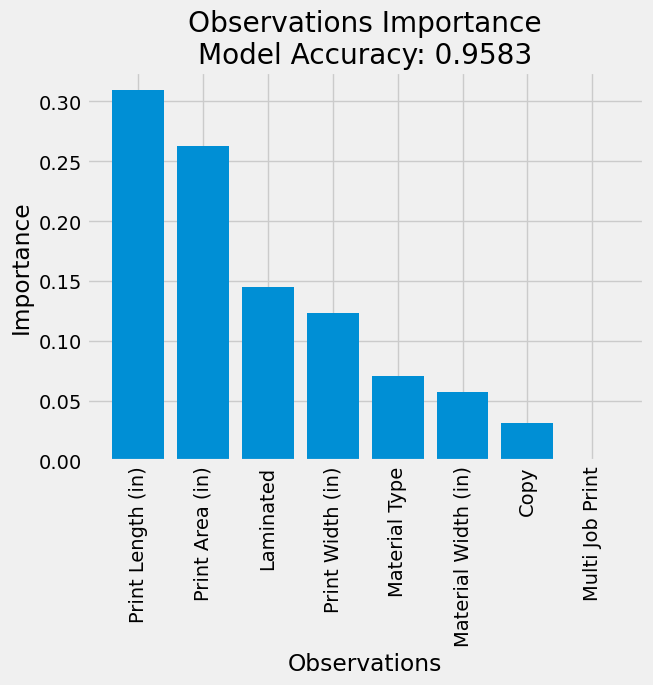

In [5689]:
# Plot the results
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('fivethirtyeight')
print(observation_names)

plt.bar(df_importance['Observations'], df_importance['Importance'], orientation = 'vertical')
plt.xticks(rotation='vertical')
plt.xlabel('Observations')
plt.ylabel('Importance')
plt.title(f'Observations Importance\nModel Accuracy: {accuracy:.4f}')
plt.show()